In [1]:
###########################
# data libraries
###########################
import pandas as pd
import numpy as np

###########################
# plot libraries
###########################
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams


###########################
# data generation
###########################
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Import and Function
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)

###########################
# transform classes into numbers
###########################
def categoricalToNumerical(df, cols):
  enc = OrdinalEncoder(dtype=np.int16)
  df[cols]= enc.fit_transform(df[cols])


In [3]:
## MAIN
train = pd.read_csv("train_with_synthetic_data.csv")
test = pd.read_csv("test_v4.csv")


###########################
# preparing dataset, transform classes into numbers
# and separate test and its target
###########################
#categoricalToNumerical(train, ['Consumer_type', 'Year', 'Month','Consumption' ,'Consumer_number', 'Installation_zone'])

enc = OrdinalEncoder(dtype=np.int16)
train[['Year', 'Month','Consumption' ,'Consumer_number', 'Installation_zone']]= enc.fit_transform(train[['Year', 'Month','Consumption' ,'Consumer_number', 'Installation_zone']])

enc_target = OrdinalEncoder(dtype=np.int16)
train[['Consumer_type']] = enc_target.fit_transform(train[['Consumer_type']])

train_target = train['Consumer_type']
train.drop(columns=['Consumer_type'],inplace=True)
train.drop(columns=['index'],inplace=True)

rfc = RandomForestClassifier(
    ccp_alpha=0,
    n_jobs=-1,
    n_estimators=10,
    max_depth=10,
    random_state=42,
    oob_score=True,
    max_features=None,
    bootstrap=True,
)

# Create the parameter grids
parameter_grid = {
    #"n_estimators": [10, 25, 50],
    #"max_depth": [10, 30, None],
    # "max_features": ["sqrt", "log2", None],
    #"criterion": ["gini", "entropy", "log_loss"]
    # "oob_score": [True, False]
    #'random_state': [0, 10],
    #'min_samples_leaf':[1, 4, 8],
    #'min_samples_split': [2, 6, 10],
}

# Create Stratified folds
cross_validation = StratifiedKFold(n_splits=10)
cross_validation.get_n_splits(train, train_target)

# Create the scoring dictionary
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=parameter_grid,
    cv=cross_validation,
    verbose=3,
    scoring=SCORING,
    return_train_score=True,
    refit="balanced_accuracy",
)

grid_search.fit(train, train_target)

print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

best_dtc = grid_search.best_estimator_
best_dtc

my_model = best_dtc
my_model.fit(train, train_target)
my_model.score(train, train_target)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/10] END  accuracy: (train=0.944, test=0.704) balanced_accuracy: (train=0.944, test=0.703) f1: (train=0.944, test=0.686) total time=  21.3s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/10] END  accuracy: (train=0.931, test=0.808) balanced_accuracy: (train=0.930, test=0.809) f1: (train=0.930, test=0.796) total time=  20.0s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/10] END  accuracy: (train=0.930, test=0.849) balanced_accuracy: (train=0.929, test=0.850) f1: (train=0.929, test=0.834) total time=  23.4s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/10] END  accuracy: (train=0.930, test=0.836) balanced_accuracy: (train=0.929, test=0.837) f1: (train=0.929, test=0.806) total time=  20.5s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/10] END  accuracy: (train=0.927, test=0.926) balanced_accuracy: (train=0.927, test=0.926) f1: (train=0.927, test=0.926) total time=  22.3s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 6/10] END  accuracy: (train=0.926, test=0.928) balanced_accuracy: (train=0.926, test=0.927) f1: (train=0.925, test=0.927) total time=  20.9s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 7/10] END  accuracy: (train=0.923, test=0.942) balanced_accuracy: (train=0.923, test=0.941) f1: (train=0.923, test=0.942) total time=  23.5s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 8/10] END  accuracy: (train=0.923, test=0.950) balanced_accuracy: (train=0.923, test=0.949) f1: (train=0.922, test=0.949) total time=  19.9s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 9/10] END  accuracy: (train=0.923, test=0.948) balanced_accuracy: (train=0.923, test=0.948) f1: (train=0.922, test=0.948) total time=  19.0s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 10/10] END  accuracy: (train=0.924, test=0.904) balanced_accuracy: (train=0.923, test=0.904) f1: (train=0.923, test=0.904) total time=  21.0s


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Best score: 0.8794795418047121
Best parameters: {}


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.9255597190724261

In [4]:
categoricalToNumerical(test, ['Consumer_type', 'Year', 'Month','Consumption' ,'Consumer_number', 'Installation_zone'])

test_target = test['Consumer_type']
test.drop(columns=['Consumer_type'],inplace=True)

my_model.fit(test, test_target)
my_model.score(test, test_target)

c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.8725714285714286

In [5]:
competition = pd.read_csv("datasets/competition.csv")
categoricalToNumerical(competition, ['Year', 'Month','Consumption' ,'Consumer_number', 'Installation_zone'])

prediction = my_model.predict(competition)
prediction = pd.DataFrame(prediction, columns=['Consumer_type'])
prediction = enc_target.inverse_transform(prediction)

Text(0.5, 1.0, 'Value Counts in the Array')

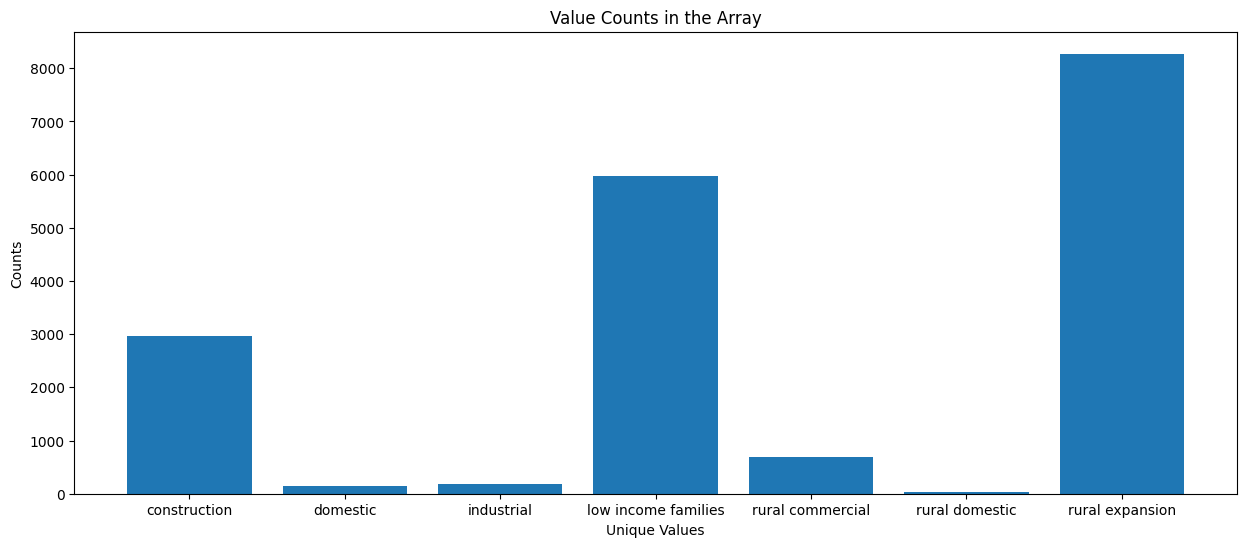

In [6]:
unique_values, counts = np.unique(prediction, return_counts=True)
figure_width = 15  # Adjust this value as needed
figure_height = 6  # Adjust this value as needed

# Create a figure with custom width and height
plt.figure(figsize=(figure_width, figure_height))
plt.bar(unique_values, counts)

# Add labels and title
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Value Counts in the Array')